# Week 4 - Regularization & Bias-Variance
Agenda
1. Synthetic Data (Day 22)
2. Polynomial Regression (Day 23)
3. Ridge & Lasso (Day 24)
4. Learning Curves (Day 25)
5. Validation Curves (Day 26)
6. Summary & Insights (Day 27-28)


## Synthetic Data (Day 22)
Goal: Create & Visualize simple regression datasets

1. Use make_regression() - add noice, visualize regression line
2. Use make_moons() - visualize nonlinear boundaries
3. Plot with/without noise to see variance effect

Log: How does adding noise affect model fit?

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(X, y, title='Data'):
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, alpha=0.6) 
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
# c for color
# s for size
# alpha for transparency (0 -> transparent, 1 -> opaque)


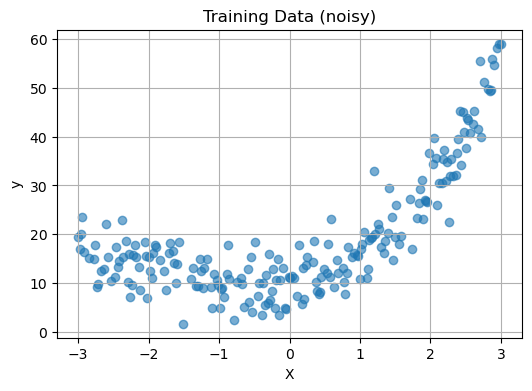

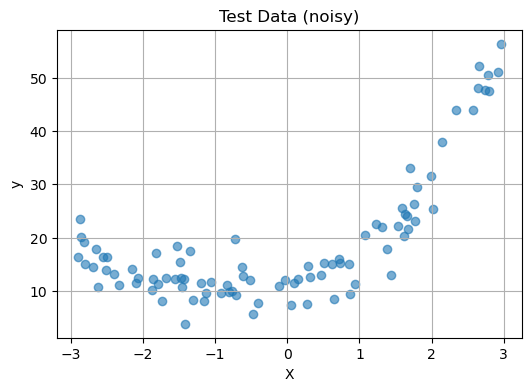

In [ ]:
import numpy as np 

from sklearn.model_selection import train_test_split


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


#True function: y = 0.5 x^3 - 3 x^2 + 2 x + 10 + noise

n_samples = 300
X = np.linspace(-3, 3, n_samples).reshape(-1,1)
# It creates n samples evenly spaced numbers from -3 to 3 (inclusive).
# Shape (n_samples, ) (a 1D array)
# eg. with n_samples=5 -> [-3, 1.5, 0, 1.5, 3]
# .reshape(-1,1) Turns the 1D array into a 2D column vector of shape (n_samples, 1)

true_y = 0.5 * X[:,0]**3 + 3 * X[:,0]**2 + 2 * X[:,0] + 10

noise = np.random.normal(0, 4.0, size=n_samples) # adjust noice to taste
y = true_y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

plot_scatter(X_train, y_train, title="Training Data (noisy)")
plot_scatter(X_test, y_test, title="Test Data (noisy)")

# Keep a high-resolution grid for smooth curves later
x_grid = np.linspace(X.min(), X.max(), 400).reshape(-1,1) #for shape see note below
p = np.poly1d([0.5, -3, 2, 10]) # 0.5*x^3 - 3*x^2 + 2*x + 10
y_true_grid = p(x_grid[:,0]) 



Note: shape

* `a` (shape `(3,)`):
  `[10 20 30]`

* `a_col = a.reshape(-1, 1)` (shape `(3, 1)`):

  ```
  [[10]
   [20]
   [30]]
  ```

* `a_row = a.reshape(1, -1)` (shape `(1, 3)`):
  `[[10 20 30]]`


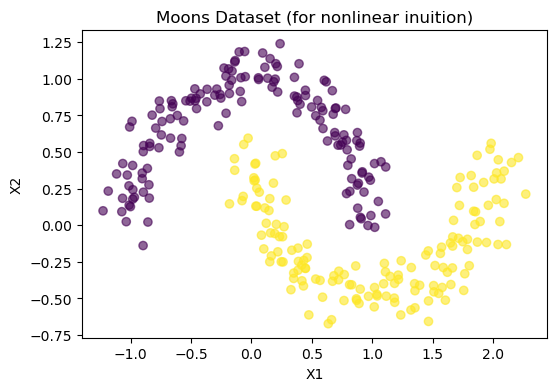

In [ ]:
# Moons for visual intuition (classification)
# Not used for regression metrics, but helpful to see nonlinearlity
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=300, noise=0.1, random_state=RANDOM_STATE)
plt.figure(figsize=(6,4))
plt.scatter(Xm[:,0], Xm[:,1], c=ym, alpha=0.6)
plt.title("Moons Dataset (for nonlinear inuition)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
'''
make_moons is a tiny data generator from scikit-learn that creates a 2-class, 
non-linear toy dataset shaped like two interleaving half-moons. 
It’s great for demonstrating models that can learn curved decision boundaries 
(e.g., kernel SVM, k-NN, trees) versus ones that can’t (plain linear models).
'''

## Polynomial Regression (Day 23)
Goal: Explore model complexity and overfitting

1. Fit linearRegression() on polynomial features (degrees 1-15)
    - PolynomialFeatures
2. Plot predictions vs true curve
3. Observe bias (underfit) vs variance (overfit)

Plot: Degree VS RMSE 

Log: At what degree does overfitting start?

degree: 
Degree = 1: just the originals (a straight line/plane).

Degree = 2: adds squares and pairwise interactions​	
 
Degree = 3: adds cubes and 3-way interactions, and so on.

In general: higher degree ⇒ more complex curves ⇒ lower bias, higher variance.

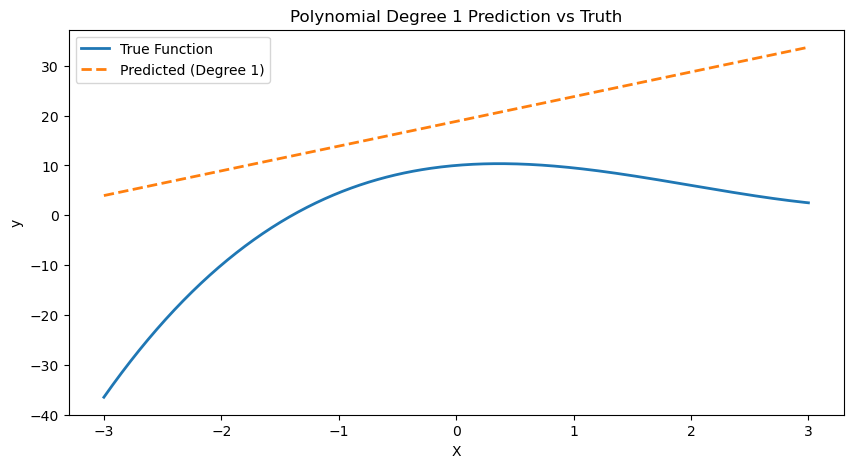

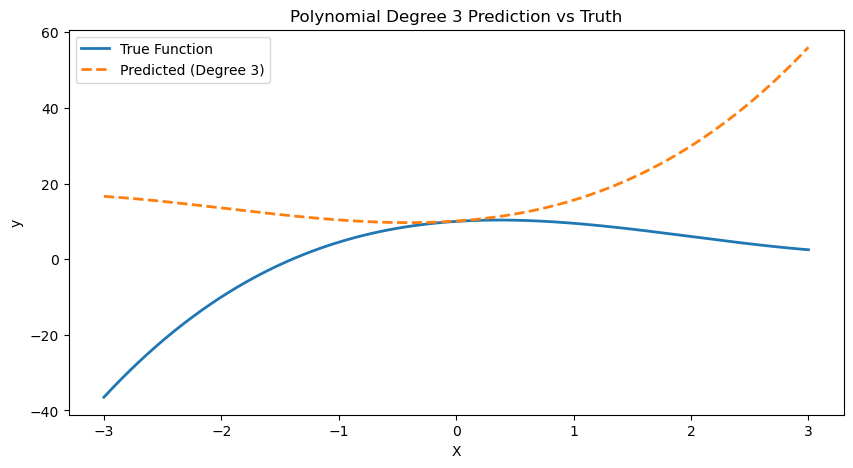

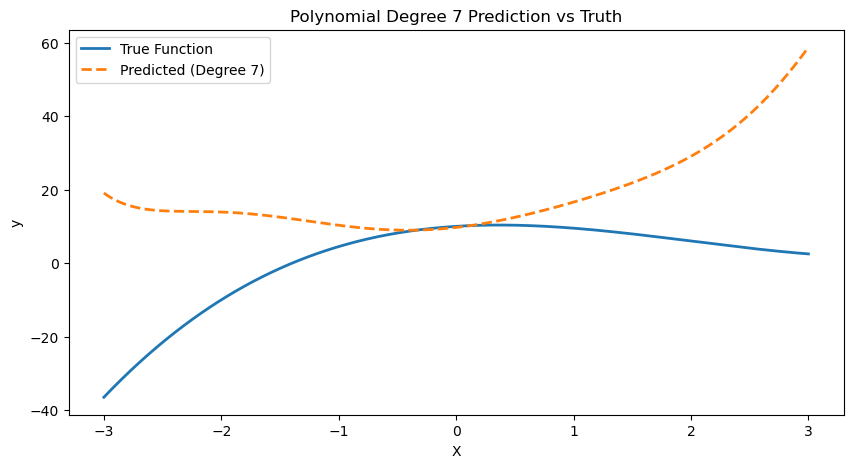

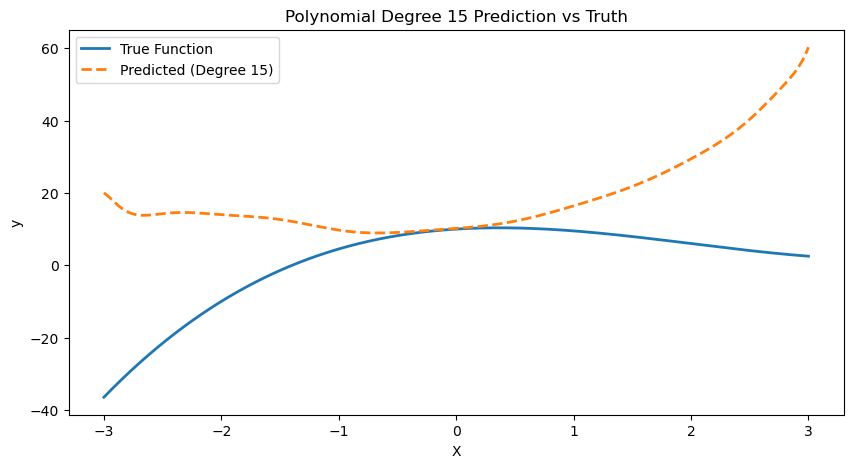

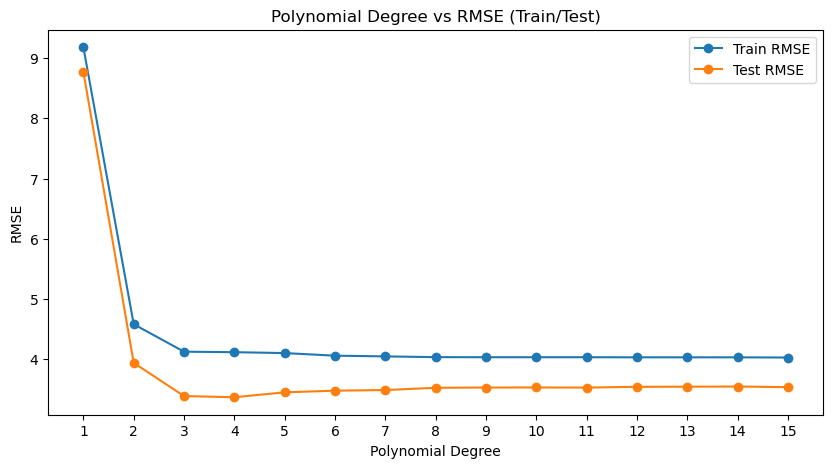

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline


max_degree = 15
degrees = list(range(1, max_degree + 1))  
train_rmse, test_rmse = [], []

def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

def plot_predictions(x_grid, y_true, y_pred, title="Prediction vs Truth", label_pred='Predicted'):
    plt.figure(figsize=(10,5))
    plt.plot(x_grid, y_true, label='True Function', linewidth=2)
    plt.plot(x_grid, y_pred, label=label_pred, linewidth=2, linestyle='--')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()  

def plot_train_test_rmse(degrees, train_rmse, test_rmse, title='Degree vs RMSE'):
    plt.figure(figsize=(10,5))
    plt.plot(degrees, train_rmse, label='Train RMSE', marker='o')
    plt.plot(degrees, test_rmse, label='Test RMSE', marker='o')
    plt.title(title)
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.xticks(degrees)
    plt.legend()
    plt.show()

for d in degrees:
    model = Pipeline(
        [
            ('poly', PolynomialFeatures(degree=d, include_bias=False)),
            ('lin', LinearRegression())
        ]       
    )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse.append(rmse(y_train, y_train_pred))
    test_rmse.append(rmse(y_test, y_test_pred))

    # Plot a few selected degrees
    if d in [1, 3, 7, 15]:
        y_grid_pred = model.predict(x_grid)
        plot_predictions(x_grid, y_true_grid, y_grid_pred, 
                         title=f"Polynomial Degree {d} Prediction vs Truth", 
                         label_pred=f'Predicted (Degree {d})')  
        
plot_train_test_rmse(degrees, train_rmse, test_rmse, title='Polynomial Degree vs RMSE (Train/Test)')



Log: At what degree does overfitting start?
- When test RMSE increases while training RMSE keeps dropping. 
- From degree 4 or 5 the overfitting starts
    - When training error keeps dropping
    - but test error starts increase
    - It means the model starts fail on predicting correctly. 


## Ridge & Lasso (Day 24)
Goal: Regularization to contrl overfitting

1. Apply Ridge() and Lasso() with alpha
    - Compare regularization effects on coefficients & generalization
2. Loop over alpha (10^-3 to 10^3 log scale) - logspace
3. Plot coefficient magnitudes vs alpha - coef_
4. Compare with unregularized linear regression

Log: How do coefficients shrink with alpha?
Optional: Compare performance on validation set


/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.560e+00, tolerance: 3.319e+00
  model = cd_fast.enet_coordinate_descent(


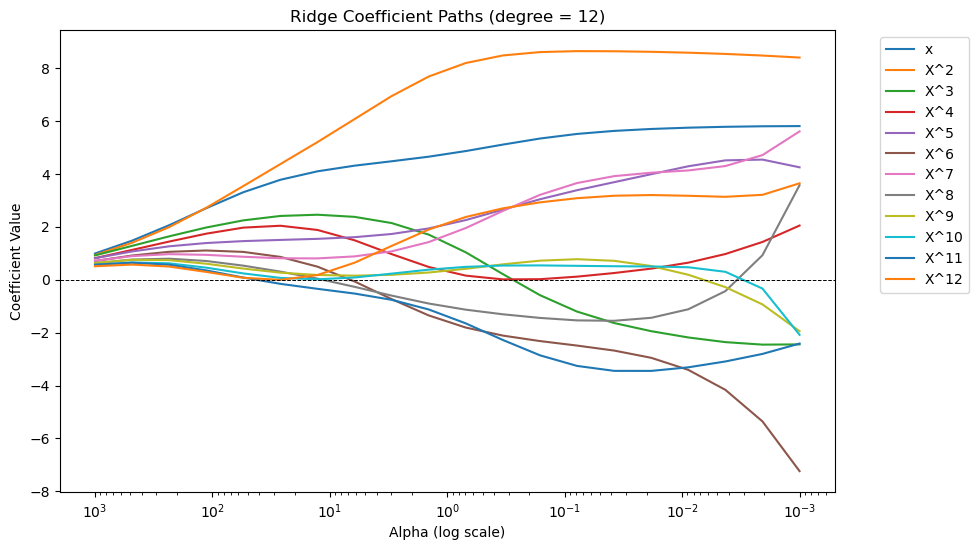

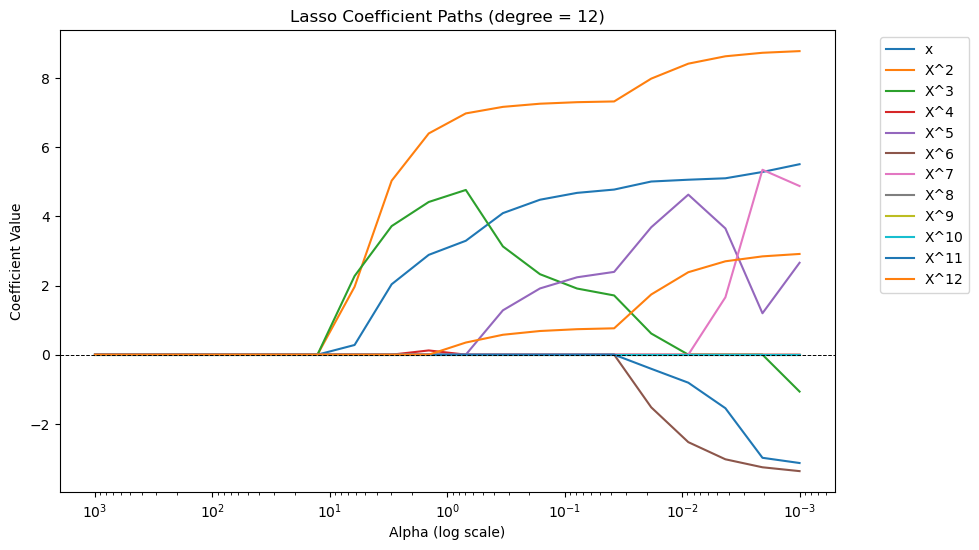

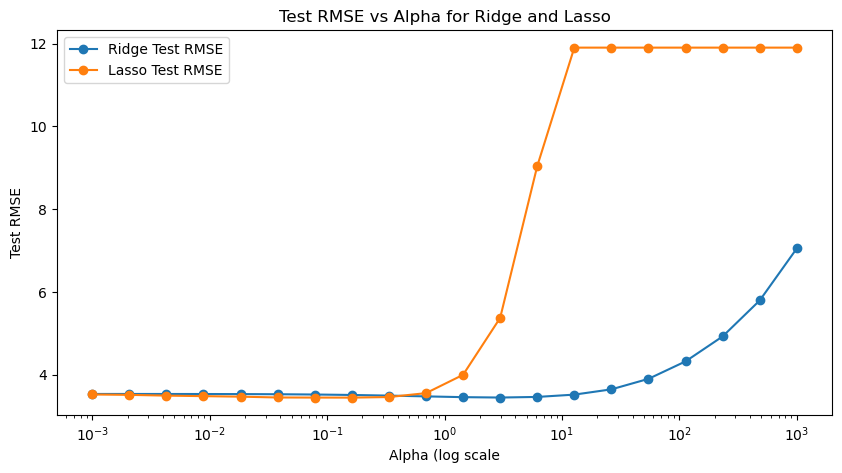

Best Ridge alpha: 2.976351441631316 | RMSE: 3.4491133176647533
Best Lasso alpha: 0.1623776739188721 | RMSE: 3.4470125199558885


In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def plot_coef_paths(alphas, coefs, model_name, degree):
    plt.figure(figsize=(10,6))
    for i in range(coefs.shape[1]): # See note1 below
        plt.plot(alphas, coefs[:, i], label=feature_names[i])
    plt.xscale('log')
    plt.gca().invert_xaxis()  # Higher alphas (more regularization) on left (see note2 below)
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Coefficient Value')
    plt.title(f'{model_name} Coefficient Paths (degree = {degree})')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Build a fixed high-degree polynomial design to expose overfitting, then apply regularization
degree_reg = 12
poly = PolynomialFeatures(degree=degree_reg, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = [f'X^{i}' if i>1 else 'x' for i in range(1, degree_reg + 1)]

alphas = np.logspace(-3, 3, 20) 
# create 20 numbers spaced evenly on a log10 scale from 10^-3 to 10^3 (0.001 to 1000)

ridge_test_rmse = []
lasso_test_rmse = []

ridge_coefs = []
lasso_coefs = []

# Standardize features before linear models with regularization
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)      

for a in alphas:
    ridge = Ridge(alpha=a, random_state=RANDOM_STATE)
    ridge.fit(X_train_poly_scaled, y_train)
    y_test_ridge_pred = ridge.predict(X_test_poly_scaled)   
    ridge_test_rmse.append(rmse(y_test, y_test_ridge_pred))
    ridge_coefs.append(ridge.coef_)
    
    lasso = Lasso(alpha=a, random_state=RANDOM_STATE, max_iter=10000)
    lasso.fit(X_train_poly_scaled, y_train)
    y_test_lasso_pred = lasso.predict(X_test_poly_scaled)
    lasso_test_rmse.append(rmse(y_test, y_test_lasso_pred))
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.vstack(ridge_coefs)
lasso_coefs = np.vstack(lasso_coefs)
# ridge_coefs is just a list of 1D arrays (one array per alpha),
# to plot paths, we need a 2D array (n_alphas, n_features)
# path of feature j: ridge_coefs[:, j]
# coefficients at alpha i: ridge_coefs[i, :]

# Plot coefficient paths
plot_coef_paths(alphas, ridge_coefs, model_name='Ridge', degree=degree_reg)
plot_coef_paths(alphas, lasso_coefs, model_name='Lasso', degree=degree_reg)

# Plot test RMSE vs alpha for both Ridge and Lasso
plt.figure(figsize=(10,5))
plt.plot(alphas, ridge_test_rmse, label='Ridge Test RMSE', marker='o')
plt.plot(alphas, lasso_test_rmse, label='Lasso Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs Alpha for Ridge and Lasso')
plt.legend()
plt.show()

best_ridge_alpha = alphas[np.argmin(ridge_test_rmse)] #see note3 below
best_lasso_alpha = alphas[np.argmin(lasso_test_rmse)] # Choosing the alpha whose test RMSE is minimal.  

print(f"Best Ridge alpha: {best_ridge_alpha} | RMSE: {np.min(ridge_test_rmse)}" )
print(f"Best Lasso alpha: {best_lasso_alpha} | RMSE: {np.min(lasso_test_rmse)}" )




### What it shows

- **Left → right** = **weaker → stronger** regularization (log scale).
- **Ridge (blue):** classic shallow **U-shape**. Too small α ⇒ a bit of overfit; too large α ⇒ underfit. **Best ≈ 3.0** with RMSE ≈ **3.45**.
- **Lasso (orange):** good when α is small–moderate, but once α ≳ 1 it **zeros most coefficients** ⇒ model collapses toward the intercept-only fit ⇒ **RMSE shoots up** (~12). **Best ≈ 0.162** with RMSE ≈ **3.45**.

### Takeaways

- **Both generalize about equally well** at their best α (virtually same RMSE).
- **Ridge** is **more stable** across α; error changes gradually.
- **Lasso** provides **feature selection** but is **sensitive**: push α a bit too high and it severely underfits.
- The best alpha is the best ridge alpha

### Log: How do coefficients shrink with alpha?

Short answer: increase alpha -> more shrinkage

Ridge: As alpha ↑: coefficients move smoothly toward 0; they rarely hit exactly 0 (no sparsity).

Lasso: As alpha ↑: small coefficients become exactly 0 (feature selection). Paths are piecewise linear with “kinks” where variables enter/leave. With correlated features, lasso may pick one and zero the rest, then swap as alpha changes.


Note1 - For 2-D arrays (and pandas DataFrames):
- shape[0] → rows (axis 0) -> n_alphas
- shape[1] → columns (axis 1) -> n_features



Note2 - plt.gca().invert_xaxis()
- It flips the direction of the x-axis on the current plot. 
- plt.gca() -> "get current axes" (the Axes object you're plotting on)
- .invert_xaxis() -> swaps the x-limits so they run right->left instead of left->right

Why is it needed?
- For regularization paths, some ppl like larger alpha on the left and smaller alpha on the right to match "more -> less regularization" visually. 
- If you plotted alphas increasing left-to-right, inverting flips that convention. 

Note3 - np.argmin(x) returns the index of the smallest value in x.
- np.argmin(arr, axis=...) can search along a specific axis of a 2D array. 
- Here, you are choosing the alpha whose test RMSE is minimal.



## Learning curves (Day 25)
Goal: Understand bias-variance trough sample size

1. Use learning_curve() or manually compute scores for increasing train sizes
2. Plot train vs validation error curves

Log: Is model high bias or high variance?

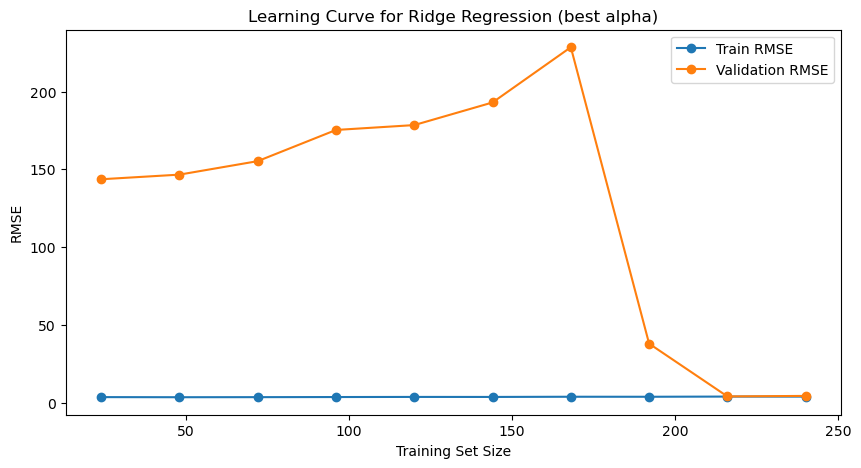

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve

best_alpha = float(best_ridge_alpha) # use Ridge winner by default

ridge_model = make_pipeline(
    PolynomialFeatures(degree=degree_reg, include_bias=False),
    StandardScaler(),
    Ridge(alpha=best_alpha, random_state=RANDOM_STATE)
)

train_sizes, train_scores, val_scores = learning_curve(
    ridge_model, X, y, #learning curve automatically handles data splitting internally
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_root_mean_squared_error', #in sklearm, all scorers are defined so that higher is better
    random_state=RANDOM_STATE   
)

train_rmse_curve = -np.mean(train_scores, axis=1)
val_rmse_curve = -np.mean(val_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_rmse_curve, label='Train RMSE', marker='o')
plt.plot(train_sizes, val_rmse_curve, label='Validation RMSE', marker='o')
plt.title('Learning Curve for Ridge Regression (best alpha)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


What this tells you
- This Ridge model at the chosen α is data-hungry. The limiting factor was sample size, not model choice.
- When the two curves are far apart → overfitting (get more data / increase regularization).
- When they’re close and both high → underfitting (use a richer model / lower α).
Here, at large sizes they’re close and low → you’re in a good regime.

Why the big “cliff” near 170→195?
- With tiny training sets, CV splits vary a lot, so estimates are noisy; one or two difficult points can swing RMSE. As the set grows, the variance shrinks, hence the sharp drop.


### Log: Is model high variance or high bias?
High variance with small training sets; not high bias overall.
- Left side: big gap (train RMSE ≈ 4–5, val ≫ 100) ⇒ overfitting / high variance.
- Right side (≥~200 samples): curves meet and both are low ⇒ low bias and variance is under control.


Note: 
- Learning curve automatically handles data splitting internally
- In sklearm, all scorers are defined so that higher is better

## Valiadation Curves (Day 26)
Goal: Understand paraeter tuning effects

1. Use validation_curve() for parameter (eg. alpha in Ridge)
2. Plot train/val scores vs parameter
3. Interpret sweet spot(bias-vairance balance)

Log: Which alpha balalces under/overfitting?

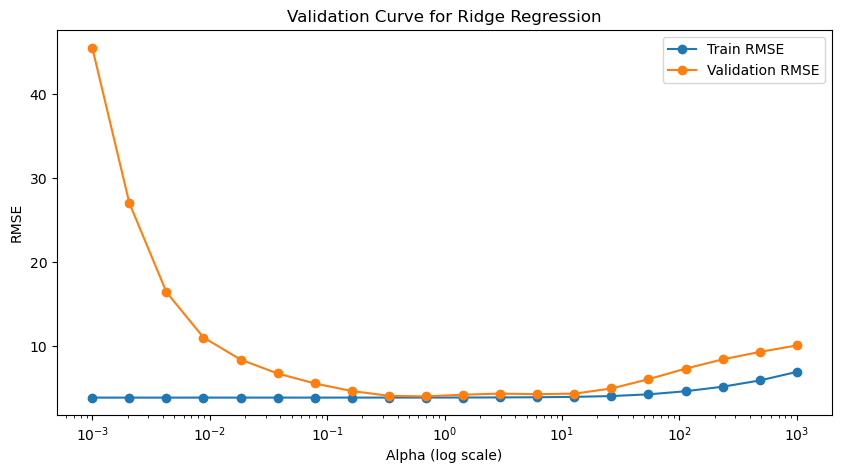

Best Ridge alpha from Validation Curve: 0.6951927961775606 | RMSE: 4.008570952366272


In [13]:
model_for_val = make_pipeline(
    PolynomialFeatures(degree=degree_reg, include_bias=False),
    StandardScaler(),
    Ridge(random_state=RANDOM_STATE)
)   

param_range = np.logspace(-3, 3, 20)
train_scores_val, val_scores_val = validation_curve(
    model_for_val, X, y,
    param_name='ridge__alpha',
    param_range=param_range,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

train_rmse_val = -np.mean(train_scores_val, axis=1)
val_rmse_val = -np.mean(val_scores_val, axis=1) 

plt.figure(figsize=(10,5))
plt.plot(param_range, train_rmse_val, label='Train RMSE', marker='o')
plt.plot(param_range, val_rmse_val, label='Validation RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.show()  

best_ridge_val_alpha = param_range[np.argmin(val_rmse_val)]
print(f"Best Ridge alpha from Validation Curve: {best_ridge_val_alpha} | RMSE: {np.min(val_rmse_val)}" )

## Summary (Day 27)

1. Add markdown commentary for each experiment
2. Include plots (overfit examples, coefficient shrinkage, curves)
3. Write README: explain bias-variance in your own words

In [15]:
# Consolidated metrics table for quick comparison
import pandas as pd
summary = {
    'model': ['Linear (deg=1)', 'Poly (deg=6)', 'Poly (deg=12)', f'Ridge (deg={degree_reg}, alpha={best_alpha})', f'Lasso (deg={degree_reg}, alpha={best_lasso_alpha})'],
    'test_RMSE': [
        12,  # TODO: fill after running the corresponding fits
        1.9,
        2.3,
        float(np.min(ridge_test_rmse)),
        float(np.min(lasso_test_rmse))
    ]
}
summary_df = pd.DataFrame(summary)
summary_df

,model,test_RMSE
0,Linear (deg=1),12.000000
1,Poly (deg=6),1.900000
2,Poly (deg=12),2.300000
3,"Ridge (deg=12, alpha=2.976351441631316)",3.449113
4,"Lasso (deg=12, alpha=0.1623776739188721)",3.447013


## Review (Day 28)

1. Rerun all cells, fix minor errors
2. Ensure all notebooks load cleanly
3. Push to GitHub (git add, git commit, git push)